In [1]:
import pandas as pd
df = pd.read_csv("epilepsy.csv")

In [2]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.pop('y')
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [5]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class: %.3f"
    % calc_prevalence(df["OUTPUT_LABEL"].values)
)

prevalence of the positive class: 0.200


In [6]:
print("# of Columns:", len(df.columns))

# of Columns: 179


In [7]:
collist = df.columns.tolist()
cols_input = collist[0:178]
df_data = df[cols_input + ["OUTPUT_LABEL"]]

In [8]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [9]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [10]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [11]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [12]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [13]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 1725):0.209
Valid prevalence(n = 1725):0.183
Train all prevalence(n = 8050):0.202


In [14]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 11500)


In [15]:
import numpy as np

rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 3248):0.500


In [16]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [17]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [18]:
# a function to fill missing values with mean of the column if needed
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [19]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (8050, 178)
Training shapes: (3248, 178) (3248,)
Validation shapes: (1725, 178) (1725,)


In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [21]:
thresh = 0.5

In [22]:
import warnings
warnings.filterwarnings('ignore')

KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.992
accuracy:0.628
recall:0.257
precision:1.000
specificity:1.000
prevalence:0.500
 
Validation:
AUC:0.964
accuracy:0.860
recall:0.235
precision:1.000
specificity:1.000
prevalence:0.183
 


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 69)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.615
accuracy:0.641
recall:0.529
precision:0.682
specificity:0.753
prevalence:0.500
 
Validation:
AUC:0.483
accuracy:0.670
recall:0.419
precision:0.254
specificity:0.726
prevalence:0.183
 


In [25]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss = 'log',alpha = 0.1)
SGDC.fit(X_train_tf, y_train)

y_train_preds = SGDC.predict_proba(X_train_tf)[:,1]
y_valid_preds = SGDC.predict_proba(X_valid_tf)[:,1]

print('SGDC')
print('Training:')
SGDC_train_auc, SGDC_train_accuracy, SGDC_train_recall, \
    SGDC_train_precision, SGDC_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
SGDC_valid_auc, SGDC_valid_accuracy, SGDC_valid_recall, \
    SGDC_valid_precision, SGDC_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

SGDC
Training:
AUC:0.569
accuracy:0.590
recall:0.517
precision:0.605
specificity:0.662
prevalence:0.500
 
Validation:
AUC:0.464
accuracy:0.597
recall:0.432
precision:0.209
specificity:0.634
prevalence:0.183
 


In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, \
nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, \
nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.983
accuracy:0.935
recall:0.897
precision:0.971
specificity:0.974
prevalence:0.500
 
Validation:
AUC:0.985
accuracy:0.961
recall:0.892
precision:0.892
specificity:0.976
prevalence:0.183
 


In [27]:
y_train_preds

array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, ...,
       1.92930137e-097, 2.94613393e-035, 8.27595627e-120])

In [28]:
y_valid_preds

array([2.03426349e-080, 5.64475218e-111, 9.32442717e-109, ...,
       3.27341106e-098, 1.00000000e+000, 5.52677700e-082])

In [29]:
pickle.dump(nb, open('nb_model.sav', 'wb'))

In [31]:
X_train_tf.shape

(3248, 178)

# Redo of data processing for TUSZ

In [32]:
import tusz_subset
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Activation, Conv2D

In [46]:
# (x_train, y_train), (x_dev, y_dev) = tfds.as_numpy(tfds.load('tusz_subset',
#                                                              split=['train', 'dev'],
#                                                              batch_size=-1,
#                                                              as_supervised=True))
(x_dev, y_dev), (x_train, y_train) = tfds.as_numpy(tfds.load('tusz_subset',
                                                             split=['train', 'dev'],
                                                             batch_size=-1,
                                                             as_supervised=True))

In [49]:
x_dev.squeeze(-1).shape[1]

64

In [50]:
x_dev_compressed = x_dev.squeeze(-1)
num_samples = x_dev_compressed.shape[0]
num_channels = x_dev_compressed.shape[1]
num_data_points = x_dev_compressed.shape[2]
x_dev_combo = np.zeros((num_samples, num_channels * num_data_points))

In [54]:
for idx in range(num_samples):
    combo_rows = np.concatenate([x for x in x_dev_compressed[idx]], axis=None)
    x_dev_combo[idx] = combo_rows

In [56]:
x_dev_df = pd.DataFrame(x_dev_combo)

In [60]:
x_dev_df.loc[:, 'OUTPUT_LABEL'] = pd.DataFrame(y_dev)

In [63]:
x_dev_df

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,OUTPUT_LABEL
0,0.000008,0.000004,-2.009131e-06,-0.000006,-0.000005,7.407766e-06,0.000017,0.000017,5.250351e-06,-0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000005,0.000001,3.144214e-06,0.000012,0.000018,1.467795e-05,0.000006,-0.000001,-1.325918e-06,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.000028,-0.000028,-2.703569e-05,-0.000027,-0.000024,-2.130927e-05,-0.000016,-0.000011,-9.893480e-06,-0.000010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.000013,-0.000013,-1.275558e-05,-0.000011,-0.000008,-5.830710e-06,-0.000004,-0.000001,4.513475e-07,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.000027,-0.000024,-2.511009e-05,-0.000037,-0.000030,-2.382859e-05,-0.000015,-0.000012,-1.781836e-05,-0.000029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,0.000002,0.000007,1.342690e-05,0.000014,0.000005,2.786120e-07,-0.000012,-0.000023,-2.242856e-05,-0.000022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9662,-0.000019,-0.000019,-1.896149e-05,-0.000019,-0.000019,-1.852566e-05,-0.000017,-0.000016,-1.671547e-05,-0.000018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9663,0.000010,0.000005,-3.041991e-07,-0.000007,-0.000015,-1.879407e-05,-0.000020,-0.000019,-1.631442e-05,-0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9664,-0.000016,-0.000025,-3.453168e-05,-0.000042,-0.000042,-4.038986e-05,-0.000038,-0.000037,-3.665712e-05,-0.000038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [64]:
x_train_compressed = x_train.squeeze(-1)
num_samples = x_train_compressed.shape[0]
num_channels = x_train_compressed.shape[1]
num_data_points = x_train_compressed.shape[2]
x_train_combo = np.zeros((num_samples, num_channels * num_data_points))

for idx in range(num_samples):
    combo_rows = np.concatenate([x for x in x_train_compressed[idx]], axis=None)
    x_train_combo[idx] = combo_rows

x_train_df = pd.DataFrame(x_train_combo)
x_train_df.loc[:, 'OUTPUT_LABEL'] = pd.DataFrame(y_train)

In [68]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class in training set: %.3f"
    % calc_prevalence(x_train_df["OUTPUT_LABEL"].values)
)

print(
    "prevalence of the positive class in dev set: %.3f"
    % calc_prevalence(x_dev_df["OUTPUT_LABEL"].values)
)

prevalence of the positive class in training set: 0.175
prevalence of the positive class in dev set: 0.177


In [70]:
combined_data = x_train_df.append(x_dev_df, ignore_index=True)

In [72]:
combined_data

,0,1,2,3,4,5,6,7,8,9,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,OUTPUT_LABEL
0,0.000092,0.000088,8.992812e-05,0.000091,0.000089,8.287322e-05,0.000096,0.000082,0.000083,0.000081,...,9.990785e-05,0.000086,9.246213e-05,0.000104,9.114950e-05,0.000116,9.012983e-05,0.000083,8.012478e-05,0
1,-0.000029,-0.000029,-3.123867e-05,-0.000031,-0.000030,-3.077695e-05,-0.000031,-0.000031,-0.000031,-0.000030,...,1.747468e-07,-0.000005,-6.354389e-06,-0.000003,-2.821123e-06,-0.000005,-9.866826e-07,-0.000002,2.071281e-07,0
2,0.000002,-0.000002,-6.596678e-06,-0.000006,-0.000010,-1.094951e-05,-0.000010,-0.000012,-0.000010,-0.000011,...,-1.729772e-06,0.000001,8.841563e-07,0.000002,9.944937e-07,-0.000003,-4.438979e-06,-0.000007,-1.235643e-06,1
3,-0.000014,-0.000021,-2.561036e-05,-0.000028,-0.000032,-3.393891e-05,-0.000031,-0.000019,-0.000033,-0.000033,...,-7.484936e-06,-0.000008,-1.245930e-05,-0.000007,-1.089710e-05,-0.000012,-5.458865e-06,-0.000006,-5.981176e-06,0
4,0.000013,0.000015,8.979600e-06,-0.000001,-0.000009,-1.665847e-05,-0.000017,-0.000017,-0.000019,-0.000020,...,-6.521782e-06,-0.000009,-1.635409e-05,-0.000029,-3.646994e-05,-0.000048,-5.797111e-05,-0.000049,-2.152212e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54887,0.000002,0.000007,1.342690e-05,0.000014,0.000005,2.786120e-07,-0.000012,-0.000023,-0.000022,-0.000022,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1
54888,-0.000019,-0.000019,-1.896149e-05,-0.000019,-0.000019,-1.852566e-05,-0.000017,-0.000016,-0.000017,-0.000018,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0
54889,0.000010,0.000005,-3.041991e-07,-0.000007,-0.000015,-1.879407e-05,-0.000020,-0.000019,-0.000016,-0.000015,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0
54890,-0.000016,-0.000025,-3.453168e-05,-0.000042,-0.000042,-4.038986e-05,-0.000038,-0.000037,-0.000037,-0.000038,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1


In [74]:
collist = combined_data.columns.tolist()
cols_input = collist[0:8192]
df_data = combined_data[cols_input + ["OUTPUT_LABEL"]]

In [75]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [76]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [77]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [78]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [79]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [80]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 8234):0.174
Valid prevalence(n = 8234):0.179
Train all prevalence(n = 38424):0.175


In [81]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 54892)


In [82]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 13436):0.500


In [83]:
df_train_all.to_csv('df_train_all_tusz.csv',index=False)
df_train.to_csv('df_train_tusz.csv',index=False)
df_valid.to_csv('df_valid_tusz.csv',index=False)
df_test.to_csv('df_test_tusz.csv',index=False)

In [84]:
import pickle
pickle.dump(cols_input, open('cols_input_tusz.sav', 'wb'))

In [85]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler_tusz.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (38424, 8192)
Training shapes: (13436, 8192) (13436,)
Validation shapes: (8234, 8192) (8234,)


In [86]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [87]:
thresh = 0.5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

In [ ]:
X_train_tf.shape

# try to train on average of all channels

In [1]:
import tusz_subset
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Activation, Conv2D

In [23]:
import numpy as np
import pandas as pd

In [2]:
(x_dev, y_dev), (x_train, y_train) = tfds.as_numpy(tfds.load('tusz_subset',
                                                             split=['train', 'dev'],
                                                             batch_size=-1,
                                                             as_supervised=True))

In [5]:
x_dev_compressed = x_dev.squeeze(-1)
num_samples = x_dev_compressed.shape[0]
num_channels = x_dev_compressed.shape[1]
num_data_points = x_dev_compressed.shape[2]
x_dev_combo = np.zeros((num_samples, num_data_points))

In [21]:
for idx in range(num_samples):
    x_dev_combo[idx] = x_dev_compressed[idx].mean(axis=0)

In [24]:
x_dev_df = pd.DataFrame(x_dev_combo)

In [25]:
x_dev_df.loc[:, 'OUTPUT_LABEL'] = pd.DataFrame(y_dev)

In [26]:
x_dev_df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,OUTPUT_LABEL
0,-0.000007,-0.000004,-0.000001,-4.339751e-06,-9.557706e-06,-0.000010,-0.000008,-0.000005,-2.562251e-06,-0.000003,...,-0.000027,-0.000026,-2.090641e-05,-0.000016,-0.000002,-7.125459e-07,3.476083e-07,-0.000009,-0.000012,0
1,-0.000010,-0.000015,-0.000011,-7.013003e-06,-2.157351e-06,-0.000003,-0.000006,-0.000007,-6.576047e-06,-0.000009,...,-0.000013,-0.000007,-1.798475e-06,0.000006,0.000003,-1.934877e-06,-1.137100e-05,-0.000020,-0.000021,0
2,-0.000001,-0.000003,-0.000001,-1.240701e-06,1.164552e-07,-0.000002,-0.000003,-0.000006,-8.816946e-06,-0.000008,...,-0.000003,-0.000001,-7.726917e-07,-0.000003,-0.000007,-6.883572e-06,-8.592138e-06,-0.000012,-0.000014,0
3,-0.000019,-0.000019,-0.000018,-1.816056e-05,-1.805600e-05,-0.000019,-0.000016,-0.000015,-1.174795e-05,-0.000009,...,-0.000014,-0.000015,-1.764283e-05,-0.000020,-0.000021,-2.481684e-05,-2.555257e-05,-0.000027,-0.000026,0
4,0.000001,-0.000005,-0.000010,-1.423888e-05,-1.432938e-05,-0.000013,-0.000006,0.000002,-6.548170e-07,-0.000006,...,-0.000027,-0.000017,-9.832716e-06,-0.000009,-0.000005,-4.043191e-06,2.869733e-06,-0.000002,-0.000003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,-0.000024,-0.000020,-0.000020,-7.960396e-06,-2.564423e-05,0.000004,0.000011,-0.000033,-2.085907e-05,-0.000024,...,-0.000012,-0.000003,-4.158658e-06,-0.000013,-0.000021,-1.726886e-05,-1.799114e-05,-0.000022,-0.000025,1
9662,-0.000013,-0.000014,-0.000014,-1.471854e-05,-1.137177e-05,-0.000013,-0.000013,-0.000012,-1.593974e-05,-0.000013,...,-0.000023,-0.000023,-2.306823e-05,-0.000023,-0.000021,-2.388908e-05,-2.187267e-05,-0.000022,-0.000021,0
9663,-0.000007,-0.000009,-0.000013,-1.854585e-05,-1.930124e-05,-0.000023,-0.000026,-0.000026,-2.685072e-05,-0.000027,...,-0.000012,-0.000010,-1.071035e-05,-0.000011,-0.000012,-1.055121e-05,-9.590154e-06,-0.000009,-0.000007,0
9664,-0.000018,-0.000024,-0.000029,-3.252550e-05,-3.268349e-05,-0.000032,-0.000029,-0.000025,-2.396195e-05,-0.000024,...,-0.000013,-0.000014,-1.363439e-05,-0.000012,-0.000007,-1.254522e-05,-9.661315e-06,-0.000019,-0.000014,1


In [28]:
x_train_compressed = x_train.squeeze(-1)
num_samples = x_train_compressed.shape[0]
num_channels = x_train_compressed.shape[1]
num_data_points = x_train_compressed.shape[2]
x_train_combo = np.zeros((num_samples, num_data_points))

for idx in range(num_samples):
    x_train_combo[idx] = x_train_compressed[idx].mean(axis=0)

x_train_df = pd.DataFrame(x_train_combo)
x_train_df.loc[:, 'OUTPUT_LABEL'] = pd.DataFrame(y_train)

In [29]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return sum(y_actual) / len(y_actual)


print(
    "prevalence of the positive class in training set: %.3f"
    % calc_prevalence(x_train_df["OUTPUT_LABEL"].values)
)

print(
    "prevalence of the positive class in dev set: %.3f"
    % calc_prevalence(x_dev_df["OUTPUT_LABEL"].values)
)

prevalence of the positive class in training set: 0.175
prevalence of the positive class in dev set: 0.177


In [30]:
combined_data = x_train_df.append(x_dev_df, ignore_index=True)

In [31]:
combined_data

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,OUTPUT_LABEL
0,2.806897e-05,0.000024,2.694147e-05,2.631345e-05,3.342525e-05,2.893065e-05,3.049098e-05,2.887583e-05,1.706594e-05,1.142987e-05,...,0.000030,0.000010,3.588595e-06,0.000002,0.000018,0.000016,0.000015,0.000042,5.537355e-05,0
1,-3.586976e-06,-0.000003,-3.815148e-06,-4.872682e-06,-5.517447e-06,-6.604569e-06,-7.234552e-06,-7.359232e-06,-7.998945e-06,-8.391219e-06,...,0.000006,0.000005,5.451828e-06,0.000006,0.000007,0.000006,0.000006,0.000005,4.949192e-06,0
2,-2.305686e-06,-0.000003,9.457199e-07,1.710799e-06,1.797817e-07,3.124812e-07,-4.158639e-07,-9.511383e-07,-3.395080e-07,-9.281217e-07,...,-0.000004,-0.000003,1.577728e-06,0.000002,0.000002,0.000003,0.000003,0.000002,2.239872e-06,1
3,6.212032e-07,0.000002,2.759689e-06,-3.015222e-06,-6.349563e-06,1.551572e-06,-9.040650e-07,1.054309e-06,1.000005e-05,8.096936e-06,...,0.000010,0.000007,-9.365033e-07,0.000005,0.000018,0.000008,0.000008,0.000006,1.042715e-05,0
4,-4.826868e-06,-0.000003,-1.890729e-06,-5.309772e-06,-7.681002e-06,-7.751689e-06,-4.373733e-06,-2.505600e-06,-3.381539e-06,-4.035801e-06,...,0.000002,0.000004,4.007283e-06,0.000005,0.000004,0.000003,0.000003,0.000004,9.012014e-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54887,-2.380721e-05,-0.000020,-1.992690e-05,-7.960396e-06,-2.564423e-05,4.145606e-06,1.059705e-05,-3.260366e-05,-2.085907e-05,-2.422808e-05,...,-0.000012,-0.000003,-4.158658e-06,-0.000013,-0.000021,-0.000017,-0.000018,-0.000022,-2.515988e-05,1
54888,-1.267327e-05,-0.000014,-1.394527e-05,-1.471854e-05,-1.137177e-05,-1.339988e-05,-1.298330e-05,-1.240143e-05,-1.593974e-05,-1.314995e-05,...,-0.000023,-0.000023,-2.306823e-05,-0.000023,-0.000021,-0.000024,-0.000022,-0.000022,-2.106025e-05,0
54889,-6.756249e-06,-0.000009,-1.256188e-05,-1.854585e-05,-1.930124e-05,-2.287567e-05,-2.552521e-05,-2.587479e-05,-2.685072e-05,-2.708476e-05,...,-0.000012,-0.000010,-1.071035e-05,-0.000011,-0.000012,-0.000011,-0.000010,-0.000009,-6.807722e-06,0
54890,-1.787499e-05,-0.000024,-2.850391e-05,-3.252550e-05,-3.268349e-05,-3.229526e-05,-2.867846e-05,-2.549913e-05,-2.396195e-05,-2.387907e-05,...,-0.000013,-0.000014,-1.363439e-05,-0.000012,-0.000007,-0.000013,-0.000010,-0.000019,-1.436840e-05,1


In [32]:
collist = combined_data.columns.tolist()
cols_input = collist[0:128]
df_data = combined_data[cols_input + ["OUTPUT_LABEL"]]

In [33]:
# check for duplicated columns in cols_input
dup_cols = set([x for x in cols_input if cols_input.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0, "you have duplicated columns in cols_input"

set()


In [34]:
# check for duplicated columns in df_data
cols_df_data = list(df_data.columns)
dup_cols = set([x for x in cols_df_data if cols_df_data.count(x) > 1])
print(dup_cols)
assert len(dup_cols) == 0,'you have duplicated columns in df_data'

set()


In [35]:
# check the size of df_data makes sense
assert (len(cols_input) + 1) == len(
    df_data.columns
), "issue with dimensions of df_data or cols_input"

In [36]:
df_data = df_data.sample(n=len(df_data))
df_data = df_data.reset_index(drop=True)

In [37]:
df_valid_test = df_data.sample(frac=0.3)
print("Validation/Test Split Size: %.1f" % (len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5)
df_valid = df_valid_test.drop(df_test.index)

df_train_all = df_data.drop(df_valid_test.index)

Validation/Test Split Size: 0.3


In [38]:
# check the prevalence of each
print(
    "Test prevalence(n = %d):%.3f"
    % (len(df_test), calc_prevalence(df_test.OUTPUT_LABEL.values))
)
print(
    "Valid prevalence(n = %d):%.3f"
    % (len(df_valid), calc_prevalence(df_valid.OUTPUT_LABEL.values))
)
print(
    "Train all prevalence(n = %d):%.3f"
    % (len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values))
)

Test prevalence(n = 8234):0.181
Valid prevalence(n = 8234):0.176
Train all prevalence(n = 38424):0.174


In [39]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 54892)


In [40]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

n = np.min([len(df_train_pos), len(df_train_neg)])

df_train = pd.concat([df_train_pos.sample(n=n, random_state=69), df_train_neg.sample(n=n, random_state=69)], axis=0, ignore_index=True)

df_train = df_train.sample(n=len(df_train), random_state=69).reset_index(drop=True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 13358):0.500


In [41]:
df_train_all.to_csv('df_train_all_tusz.csv',index=False)
df_train.to_csv('df_train_tusz.csv',index=False)
df_valid.to_csv('df_valid_tusz.csv',index=False)
df_test.to_csv('df_test_tusz.csv',index=False)

In [42]:
import pickle
pickle.dump(cols_input, open('cols_input_tusz.sav', 'wb'))

In [43]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

scalerfile = 'scaler_tusz.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training All shapes: (38424, 128)
Training shapes: (13358, 128) (13358,)
Validation shapes: (8234, 128) (8234,)


In [44]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [45]:
thresh = 0.5

In [68]:
X_train_tf.shape

(13358, 128)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.758
accuracy:0.690
recall:0.694
precision:0.689
specificity:0.678
prevalence:0.500
 
Validation:
AUC:0.761
accuracy:0.684
recall:0.708
precision:0.320
specificity:0.670
prevalence:0.176
 


In [75]:
y_valid_preds[0:100]

array([0.78, 0.29, 0.46, 0.3 , 0.54, 0.48, 0.35, 0.49, 0.58, 0.2 , 0.33,
       0.7 , 0.2 , 0.36, 0.5 , 0.15, 0.83, 0.29, 0.65, 0.2 , 0.57, 0.64,
       0.01, 0.25, 0.82, 0.76, 0.06, 0.31, 0.15, 0.4 , 0.35, 0.  , 0.88,
       0.33, 0.4 , 0.84, 0.66, 0.75, 0.33, 0.39, 0.05, 0.74, 0.81, 0.01,
       0.44, 0.16, 0.88, 0.2 , 0.02, 0.87, 0.62, 0.33, 0.51, 0.21, 0.25,
       0.73, 0.14, 0.17, 0.06, 0.16, 0.8 , 0.04, 0.32, 0.  , 0.28, 0.88,
       0.25, 0.82, 0.62, 0.18, 0.12, 0.23, 0.9 , 0.81, 0.19, 0.18, 0.41,
       0.26, 0.56, 0.61, 0.1 , 0.61, 0.74, 0.12, 0.25, 0.73, 0.19, 0.28,
       0.64, 0.38, 0.19, 0.71, 0.16, 0.19, 0.34, 0.61, 0.41, 0.88, 0.88,
       0.26])

In [65]:
import pickle

In [66]:
pickle.dump(knn, open('knn_classifier.pkl', 'wb'), protocol=4)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 69)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.566
accuracy:0.543
recall:0.604
precision:0.538
specificity:0.482
prevalence:0.500
 
Validation:
AUC:0.530
accuracy:0.473
recall:0.575
precision:0.183
specificity:0.452
prevalence:0.176
 


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(loss = 'log',alpha = 0.1)
SGDC.fit(X_train_tf, y_train)

y_train_preds = SGDC.predict_proba(X_train_tf)[:,1]
y_valid_preds = SGDC.predict_proba(X_valid_tf)[:,1]

print('SGDC')
print('Training:')
SGDC_train_auc, SGDC_train_accuracy, SGDC_train_recall, \
    SGDC_train_precision, SGDC_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
SGDC_valid_auc, SGDC_valid_accuracy, SGDC_valid_recall, \
    SGDC_valid_precision, SGDC_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

SGDC
Training:
AUC:0.527
accuracy:0.530
recall:0.643
precision:0.525
specificity:0.418
prevalence:0.500
 
Validation:
AUC:0.511
accuracy:0.443
recall:0.634
precision:0.185
specificity:0.402
prevalence:0.176
 


In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, \
nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, \
nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.527
accuracy:0.524
recall:0.963
precision:0.513
specificity:0.084
prevalence:0.500
 
Validation:
AUC:0.526
accuracy:0.236
recall:0.965
precision:0.183
specificity:0.080
prevalence:0.176
 


In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 69)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=69)

In [51]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, \
tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, \
tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.877
accuracy:0.799
recall:0.806
precision:0.794
specificity:0.790
prevalence:0.500
 
Validation:
AUC:0.693
accuracy:0.656
recall:0.679
precision:0.294
specificity:0.650
prevalence:0.176
 


In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 6, random_state = 69)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, \
rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, \
rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.820
accuracy:0.742
recall:0.744
precision:0.741
specificity:0.740
prevalence:0.500
 
Validation:
AUC:0.775
accuracy:0.702
recall:0.706
precision:0.335
specificity:0.701
prevalence:0.176
 


In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0, max_depth=3, random_state=69)
gbc.fit(X_train_tf, y_train)

y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, \
gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, \
gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.943
accuracy:0.871
recall:0.884
precision:0.861
specificity:0.857
prevalence:0.500
 
Validation:
AUC:0.751
accuracy:0.677
recall:0.716
precision:0.316
specificity:0.669
prevalence:0.176
 


In [54]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [55]:
etc = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=1.0,
                           min_samples_leaf=3, min_samples_split=20, n_estimators=100)
etc.fit(X_train_tf, y_train)

y_train_preds = etc.predict_proba(X_train_tf)[:, 1]
y_valid_preds = etc.predict_proba(X_valid_tf)[:, 1]

print('Extra Trees Classifier')
print('Training:')
etc_train_auc, etc_train_accuracy, etc_train_recall, etc_train_precision, \
etc_train_specificity = print_report(y_train, y_train_preds, thresh)
print('Validation:')
etc_valid_auc, etc_valid_accuracy, etc_valid_recall, etc_valid_precision, \
etc_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Extra Trees Classifier
Training:
AUC:0.999
accuracy:0.988
recall:0.991
precision:0.986
specificity:0.986
prevalence:0.500
 
Validation:
AUC:0.817
accuracy:0.744
recall:0.739
precision:0.382
specificity:0.745
prevalence:0.176
 


In [56]:
from xgboost import XGBClassifier
import xgboost as xgb
xgbc = XGBClassifier()
xgbc.fit(X_train_tf, y_train)

y_train_preds = xgbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = xgbc.predict_proba(X_valid_tf)[:,1]

print('Xtreme Gradient Boosting Classifier')
print('Training:')
xgbc_train_auc, xgbc_train_accuracy, xgbc_train_recall, xgbc_train_precision, \
xgbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgbc_valid_auc, xgbc_valid_accuracy, xgbc_valid_recall, xgbc_valid_precision, \
xgbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

/usr/local/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:29:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xtreme Gradient Boosting Classifier
Training:
AUC:0.998
accuracy:0.982
recall:0.991
precision:0.974
specificity:0.973
prevalence:0.500
 
Validation:
AUC:0.795
accuracy:0.713
recall:0.742
precision:0.351
specificity:0.707
prevalence:0.176
 


In [57]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB','XGBC','XGBC','ETC','ETC'],
                           'data_set':['train','valid']*9,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,SGDC_train_auc,SGDC_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,xgbc_train_auc,xgbc_valid_auc,etc_train_auc,etc_valid_auc],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,SGDC_train_accuracy, SGDC_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,xgbc_train_accuracy,xgbc_valid_accuracy,etc_train_accuracy,etc_valid_accuracy],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,SGDC_train_recall,SGDC_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,xgbc_train_recall,xgbc_valid_recall,etc_train_recall,etc_valid_recall],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,SGDC_train_precision,SGDC_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,xgbc_train_precision,xgbc_valid_precision,etc_train_precision,etc_valid_precision],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,SGDC_train_specificity,SGDC_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,xgbc_train_specificity,xgbc_valid_specificity,etc_train_specificity,etc_valid_specificity]})

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

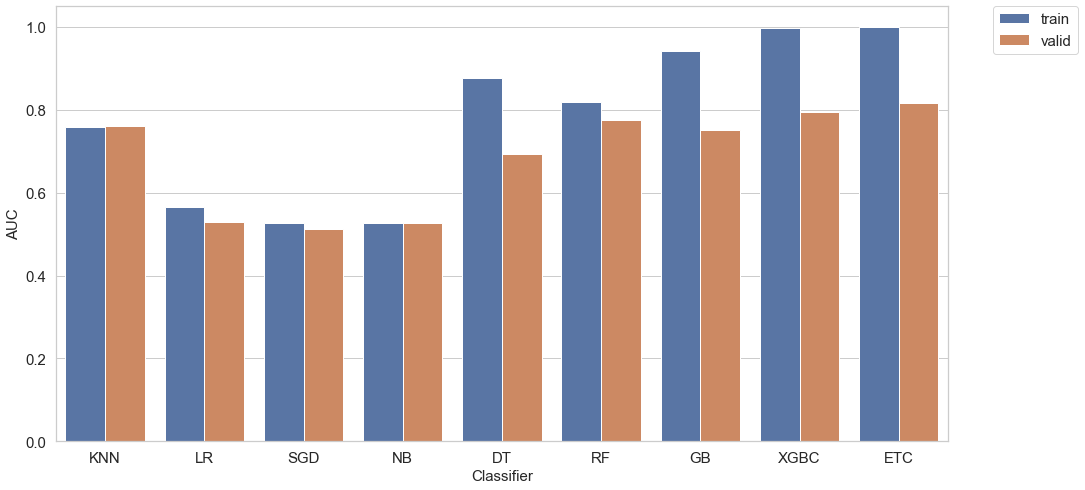

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc', hue = 'data_set', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

In [60]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:61317 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


In [62]:
from tpot import TPOTClassifier
import numpy as np
tpot_config = {
    'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1]
    },
    'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    }

}
pipeline_optimizer = TPOTClassifier(verbosity=2, periodic_checkpoint_folder='tpot', generations=100, population_size=100, scoring='roc_auc', use_dask=True, config_dict=tpot_config)
pipeline_optimizer.fit(X_train_tf, y_train)
print(pipeline_optimizer.score(X_valid, y_valid))
pipeline_optimizer.export('tpot_exported_pipeline.py')

[02:33:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[02:33:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:33:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [81]:
import mne
import math

In [78]:
# Inference on specific example
example_file = '/Users/robert/eeg_data/edf/train/03_tcp_ar_a/104/00010418/s017_2014_05_31/00010418_s017_t001.edf'

load_example = mne.io.read_raw_edf(example_file, preload=True)

Extracting EDF parameters from /Users/robert/eeg_data/edf/train/03_tcp_ar_a/104/00010418/s017_2014_05_31/00010418_s017_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...


In [79]:
def preprocess(raw: mne.io.edf.edf.RawEDF):
    samp_freq = raw.info['sfreq']
    nchannels = raw.info['nchan']
    nyquist_freq = int(samp_freq / 2)
    freqs = range(60, nyquist_freq, 60)
    # Notch filter
    notch_filtered = mne.filter.notch_filter(raw._data, samp_freq, freqs)
    # TODO: Bandpass filter
    # TODO: Referencing op
    # Downsampling
    notch_filtered = mne.io.RawArray(notch_filtered, raw.info)
    downsampled = notch_filtered.resample(samp_freq / 2)._data
    # Reshape to have 64 channels, to fit model
    # TODO: Better strat than this later
    num_samples = np.shape(downsampled)[1]
    if (nchannels > 64):
        # pick only the first 64
        downsampled = downsampled[0:64]
    else:
        # Repeat the channels till we get 64
        right_nchannels = np.zeros((64, num_samples))
        num_reps = math.floor(64 / nchannels)
        for i in range(num_reps):
            start_ind = i * nchannels
            end_ind = (i + 1) * nchannels
            # Downsampled end index, for times when 64 isn't
            # a multiple of nchannels
            dend_ind = nchannels
            if (end_ind > 64):
                overflow = end_ind - 64
                end_ind = 64
                dend_ind = nchannels - overflow

            right_nchannels[i * nchannels: (i+1) * nchannels] = downsampled[0:dend_ind]
        downsampled = right_nchannels

    # Needs another reshaping to be 64 * (multiple of 128) * 1
    return downsampled.reshape(64, num_samples, 1)

In [82]:
preprocessed_example = preprocess(load_example)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Creating RawArray with float64 data, n_channels=31, n_times=153856
    Range : 0 ... 153855 =      0.000 ...   600.996 secs
Ready.


In [83]:
preprocessed_example.shape

(64, 76928, 1)

In [84]:
def get_edf_length(raw: mne.io.edf.edf.RawEDF):
    return np.shape(raw._data)[1]/raw.info['sfreq']

In [85]:
edf_length = get_edf_length(load_example)

In [90]:
# Inference on specific example
# example_file = '/Users/robert/eeg_data/edf/train/03_tcp_ar_a/104/00010418/s017_2014_05_31/00010418_s017_t001.edf'
example_file = '/Users/robert/eeg_data/edf/train/02_tcp_le/024/00002448/s001_2006_01_26/00002448_s001_t004.edf'
# example_file = '/Users/robert/eeg_data/edf/train/02_tcp_le/051/00005101/s002_2008_10_22/00005101_s002_t000.edf'
load_example = mne.io.read_raw_edf(example_file, preload=True)
preprocessed_example = preprocess(load_example)
edf_length = get_edf_length(load_example)
bin_width = 10000
bin_interval = 5000

num_of_bins = math.floor(((edf_length - (bin_width / 1000)) * 1000)/bin_interval) + 1
# Save results to file
# bin width is always a multiple of 1000, so no need to math floor
# But do it anyway to get an int
bin_width_s = math.floor(bin_width / 1000)
bin_int_s = bin_interval / 1000
# Prediction for each bin
for i in range(num_of_bins):
    # start of ith bin in milliseconds: i * bin_interval
    # Of course there are 128 data points in a second
    # So proper formula is i * bin_interval * 128/1000
    # Round down
    bin_start = math.floor(i * bin_int_s * 128)
    # end of ith bin = start of bin + bin width
    # Conversion: start of bin + (bin width * 128/1000)
    bin_end = bin_start + (bin_width_s * 128)
    curr_bin = preprocessed_example[0:64, bin_start:bin_end]
    # bin_width > 1, but model expects 1 second each
    # Try passing batch of 1 sec
    batched_bins = np.zeros((bin_width_s, 64, 128, 1))
    # Make bin into batch of 1 second slices
    # Model expecting 1 second (128 samples)
    for j in range(bin_width_s):
        batch_start = j * 128
        batch_end = (j + 1) * 128
        batched_bins[j] = curr_bin[0:64, batch_start:batch_end]

    bins_squeezed = batched_bins.squeeze(-1)
    combined_samples = np.zeros((bin_width_s, 128))
    for idx in range(bin_width_s):
        combined_samples[idx] = bins_squeezed[idx].mean(axis=0)

    combined_samples_tf = scaler.transform(combined_samples)
    predictions = knn.predict(combined_samples_tf)
    result = np.mean(predictions).astype(float)
    print('bin:', i, " result:", result)

Extracting EDF parameters from /Users/robert/eeg_data/edf/train/02_tcp_le/024/00002448/s001_2006_01_26/00002448_s001_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 234999  =      0.000 ...   939.996 secs...
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Creating RawArray with float64 data, n_channels=33, n_times=235000
    Range : 0 ... 234999 =      0.000 ...   939.996 secs
Ready.
bin: 0  result: 0.1
bin: 1  result: 0.0
bin: 2  result: 0.0
bin: 3  result: 0.0
bin: 4  result: 0.0
bin: 5  result: 0.0
bin: 6  result: 0.0
bin: 7  result: 0.2
bin: 8  result: 0.2
bin: 9  result: 0.0
bin: 10  result: 0.0
bin

ValueError: could not broadcast input array from shape (64,124,1) into shape (64,128,1)